## CHAPTER 1
---
# THE REALM OF SUPERVISED LEARNING

---
## PART A. PYTHON MACHINE LEARNING COOKBOOK, CHAP. 1
### Introduction

- **Supervised learning**: building a machine learning model that is based on labeled samples

- **Unsupervised learning**: there is no labeled data available

## 1.1 Buiding a Linear Regressor

- The linear regression method consists of precisely identifying a line that is capable of representing point distribution in a two-dimensional plane
- There is only one mathematical model, out of an infinite number of lines, that optimizes the representation of the given data
- **Ordinary least squares**: the coefficients are estimated by determining numerical values that minimize the sum of the squared deviations between the observed responses and the fitted responses
- **Our task in this section:** is to use the data in *VehiclesItaly.txt* to find the linear regression relation between the vehicle registrations (X) in a state and the population (y) of a state. 

In [1]:
filename = "data/VehiclesItaly.txt"

X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)
        
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

In [2]:
# another way of opening the file
import pandas as pd
vehicles = pd.read_csv(filename, header=None)
vehicles.columns = ['X', 'Y']
vehicles.head()

,X,Y
0,145263,127329
1,204477,312027
2,361034,573694
3,616716,891181
4,885665,1059114


In [3]:
import numpy as np

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [4]:
# Create linear regression object
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

# Predict the output
y_train_pred = linear_regressor.predict(X_train)

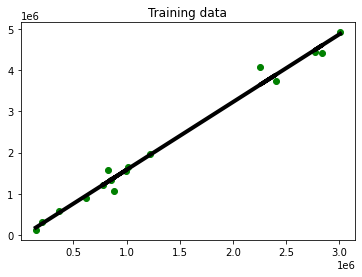

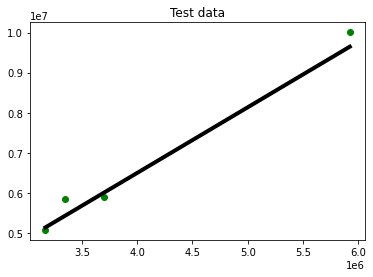

In [5]:
# Plot outputs
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

As you might expect, there's a positive association between a state's population and the number of vehicle registrations.

## 1.2 Computing regression accuracy

An error is defined as the difference between the actual value and the value that is predicted by the regressor.

In [6]:
# Measure performance
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explained variance score = 0.98
R2 score = 0.98


A good practice is to make sure that the mean squared error is low and the explained variance score is high (which measures how well our model can account for the variation in our dataset.)

The *sklearn.metrics* module contains a series of simple functions that measure prediction error:
- Functions ending with  _score return a value to maximize; the higher the better
- Functions ending with _error or _loss return a value to minimize; the lower the better

## 1.3 Achieving model persistence
- We want to save our training model as a file so that it can be used later by simply loading it again.
- To do this, we can use the pickle module which stores Python objects. 

In [7]:
# Model persistence
import pickle

output_model_file = "code/3_model_linear_regr.pkl"

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

- The regressor object is now saved in the 3_model_linear_regr.pkl file, which is inside the 'code' subfolder, in the folder where this notebook is located. 
- Let's look at how to load it and use it

In [8]:
with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)
print("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

New mean absolute error = 241907.27


The *pickle* module transforms an arbitrary Python object into a series of bytes. This process is also called the serialization of the object. The byte stream representing the object can be transmitted or stored, and subsequently rebuilt to create a new object with the same characteristics. The inverse operation is called **unpickling**.

## 1.4 Building a ridge regressor
- One of the main problems of linear regression is that it's sensitive to outliers. 
- During data collection in the real world, it's quite common to wrongly measure output. 
- Linear regression uses ordinary least squares, which tries to minimize the squares of errors. 
- The outliers tend to cause problems because they contribute a lot to the overall error. 
- This tends to disrupt the entire model.
- Ordinary least squares considers *every single data point*, including outliers, when it's building the model. The coefficients are estimated by determining numerical values that minimize the sum of the squared deviations between the observed responses and the fitted responses.
- *Ridge, Lasso, and ElasticNet* are some of the most popular biased estimators methods, which are based on regularization and are used to deal with the problems caused by outliers, mainly overfitting.
- **Ridge regression** is a regularization method where a penalty, *alpha*, is imposed on the size of the coefficients. 

In [9]:
from sklearn import linear_model

ridge_regressor = linear_model.Ridge(alpha=0.01, 
                                     fit_intercept=True, 
                                     max_iter=10000)

ridge_regressor.fit(X_train, y_train)

y_test_pred_ridge = ridge_regressor.predict(X_test)
print( "Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print( "Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print( "R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


These are the exact error metrics that we got on the linear regressor above. Playing with alpha values does nothing to the metrics except on the mean squared error where it goes up just a little bit even after setting alpha to 500. 

**Note:**
- In ridge regression, a scale transformation has a substantial effect. 
- Therefore, to avoid obtaining different results depending on the predicted scale of measurement, it is advisable to standardize all predictors before estimating the model. 

## 1.5 Building a polynomial regressor
- One of the main constraints of a linear regression model is the fact that it tries to fit a linear function to the input data. 
- The polynomial regression model overcomes this issue by allowing the function to be a polynomial, thereby increasing the accuracy of the model.
- Polynomial models should be applied where the relationship between response and explanatory variables is curvilinear.

<function matplotlib.pyplot.show(*args, **kw)>

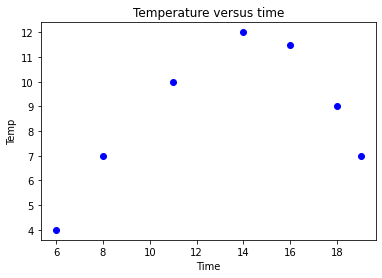

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Time = np.array([6, 8, 11, 14, 16, 18, 19])
Temp = np.array([4, 7, 10, 12, 11.5, 9, 7])

plt.figure()
plt.plot(Time, Temp, 'bo')
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title('Temperature versus time')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

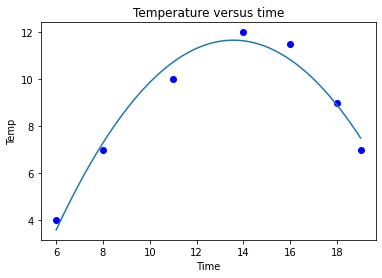

In [11]:
beta = np.polyfit(Time, Temp, 2)
p = np.poly1d(beta)

xp = np.linspace(6, 19, 100)
plt.figure()
plt.plot(Time, Temp, 'bo', xp, p(xp), '-')
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title('Temperature versus time')
plt.show

- If we analyze the graph, we can see that the curve fits our data sufficiently. 
- This model fits the data to a greater extent than a simple linear regression model. 
- In regression analysis, it's important to keep the order of the model as low as possible. 
- In the first analysis, we keep the model as a first order polynomial. 
- If this is not satisfactory, then a second-order polynomial is tried. 
- The use of higher-order polynomials can lead to incorrect evaluations.

## 1.6 Estimating housing prices
- Let's apply all these principles to estimate house prices. 
- This is one of the most popular examples that is used to understand regression, and it serves as a good entry point. 
- This is intuitive and relatable, hence making it easier to understand the concepts before we perform more complex things in machine learning. 
- We will use a decision tree regressor with AdaBoost to solve this problem.
    - A decision tree is a tree where each node makes a simple decision that contributes to the final output. 
    - *AdaBoost* stands for adaptive boosting, and this is a technique that is used to boost the accuracy of the results from another system.

In [12]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [13]:
# load the data from Scikit-Learn
housing_data = datasets.load_boston()

# separate labels and target, and shuffle the ordering
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

- The sklearn.utils.shuffle() function shuffles arrays or sparse matrices in a consistent way to do random permutations of collections. 
- Shuffling data reduces variance and makes sure that the patterns remain general and less overfitted. 
- The random_state parameter controls how we shuffle data so that we can have reproducible results. 

In [14]:
# divide data into 80% training and 20% testing
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# fit a decision tree regression model
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

# fit the model with AdaBoost
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                                 n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

# evaluate the performance of dt-regressor
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)

print("Decision Tree Performance")
print('-'* len('Decision Tree Performance'))
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

Decision Tree Performance
-------------------------
Mean squared error = 14.79
Explained variance score = 0.82


In [15]:
# let's evaluate the performance of AdaBoost
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print("AdaBoost performance")
print('-'* len('AdaBoost performance'))
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

AdaBoost performance
--------------------
Mean squared error = 7.54
Explained variance score = 0.91


The error is lower and the variance score is closer to 1 when we use AdaBoost, as shown in the preceding output.

An AdaBoost regressor is a meta-estimator that starts by equipping a regressor on the actual dataset and adding additional copies of the regressor on the same dataset, but where the weights of instances are adjusted according to the error of the current prediction. As such, consecutive regressors look at difficult cases. This will help us compare the results and see how AdaBoost really boosts the performance of a decision tree regressor.

## 1.7 Computing the relative importance of features
- In this case, we used 13 input features with unequal contribution to the output. 
- In case we want to discard some of them later, we need to know which features are less important. 
- We have this functionality available in scikit-learn, *feature_importances_*.

In [16]:
# extract decision tree feature importance
DTFImp= dt_regressor.feature_importances_
DTFImp= 100.0 * (DTFImp / max(DTFImp))
index_sorted = np.flipud(np.argsort(DTFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5
pos

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5])

- To compare the results, the importance values have been normalized so that they range between 0 and 100. 
- Then, we ordered the index values and turned them upside down so that they are arranged in descending order of importance. 
- Finally, for display purposes, the location of the labels on the x-axis has been centered.

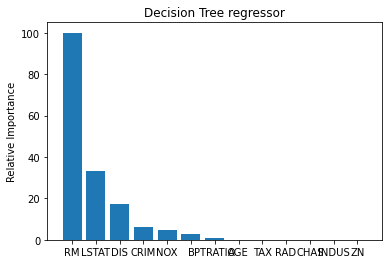

In [17]:
# plot the bar graph for visualization of results
plt.figure()
plt.bar(pos, DTFImp[index_sorted], align='center')
plt.xticks(pos, housing_data.feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("Decision Tree regressor")
plt.show()

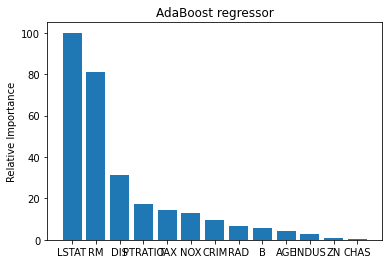

In [18]:
# extract and plot feature importance for AdaBoost
ABFImp= ab_regressor.feature_importances_ 
ABFImp= 100.0 * (ABFImp / max(ABFImp))
index_sorted = np.flipud(np.argsort(ABFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

plt.figure()
plt.bar(pos, ABFImp[index_sorted], align='center')
plt.xticks(pos, housing_data.feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("AdaBoost regressor")
plt.show()

- So, the decision tree regressor says that the most important feature is RM.
- According to AdaBoost, the most important feature is LSTAT. 
- In reality, if you build various regressors on this data, you will see that the most important feature is in fact LSTAT. 
- This shows the advantage of using AdaBoost with a decision tree-based regressor.

## 1.8 Estimating bicycle demand distribution

- Let's use a different regression, *random forest regressor*, method to solve the bicycle demand distribution problem. 
- A random forest is a collection of decision trees. This basically uses a set of decision trees that are built using various subsets of the dataset, and then it uses averaging to improve the overall performance. 
The data:
- file: bike_day.csv
- there are 16 columns in the dataset:
    - the first two correspond to the serial number and the actual date, so we won't use them for our analysis.
    - the last column is just the sum of the values in the fourteenth and fifteenth columns, so we can leave those two out

In [19]:
import csv
import numpy as np

filename = "data/bike_day.csv"
file_reader = csv.reader(open(filename, 'r'), delimiter=',')
X, y = [], []
for row in file_reader:
    X.append(row[2:13])
    y.append(row[-1])

In [20]:
# easier way to open (I think)
# won't use it though
import pandas as pd
bike = pd.read_csv(filename)

In [21]:
# display feature names
feature_names = np.array(X[0])
feature_names

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], dtype='<U10')

In [22]:
# remove feature names and make two arrays
X=np.array(X[1:]).astype(np.float32)
y=np.array(y[1:]).astype(np.float32)

In [23]:
# shuffle the two arrays
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=7) 

# separate data into 90% training and 10% testing
num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [24]:
# train the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=1000, 
                                     max_depth=10, 
                                     min_samples_split=2)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000)

Here, 
- n_estimators refers to the number of decision trees that we want to use in our random forest. 
- the max_depth parameter refers to the maximum depth of each tree, and 
- the min_samples_split parameter refers to the number of data samples that are needed to split a node in the tree.

In [25]:
# evaluate the random forrest performance
y_pred = rf_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print( "Random Forest regressor performance")
print('-'* len('Random Forest regressor performance'))
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

Random Forest regressor performance
-----------------------------------
Mean squared error = 360892.87
Explained variance score = 0.89


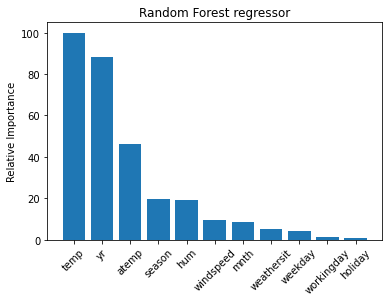

In [26]:
# extract and visualize the importance of features
RFFImp= rf_regressor.feature_importances_ 
RFFImp= 100.0 * (RFFImp / max(RFFImp))
index_sorted = np.flipud(np.argsort(RFFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

import matplotlib.pyplot as plt
plt.figure()
plt.bar(pos, RFFImp[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted], rotation=45)
plt.ylabel('Relative Importance')
plt.title("Random Forest regressor")
plt.show()

Looks like the temperature is the most important factor controlling bicycle rentals.

The final result returned by the random forest is nothing but the average of the numerical result returned by the different trees in the case of a regression, or the class returned by the largest number of trees if the random forest algorithm was used to perform classification.

In [27]:
# include the 14th and 15th columns
import csv
import numpy as np
filename = "data/bike_day.csv"
file_reader = csv.reader(open(filename, 'r'), delimiter=',')
X, y = [], []
for row in file_reader:
    X.append(row[2:15])
    y.append(row[-1])
    
# isolate feature names
feature_names = np.array(X[0])

# remove feature names and make two arrays
X=np.array(X[1:]).astype(np.float32)
y=np.array(y[1:]).astype(np.float32)

# shuffle the two arrays
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=7) 

# separate data into 90% training and 10% testing
num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# train the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=1000, 
                                     max_depth=10, 
                                     min_samples_split=2)
rf_regressor.fit(X_train, y_train)

# evaluate the random forrest performance
y_pred = rf_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print( "Random Forest regressor performance")
print('-'* len('Random Forest regressor performance'))
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

Random Forest regressor performance
-----------------------------------
Mean squared error = 21766.9
Explained variance score = 0.99


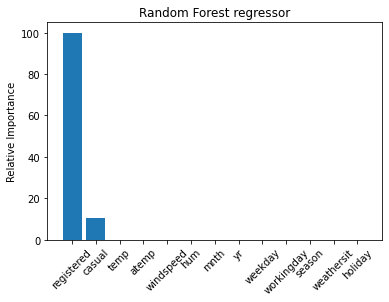

In [28]:
# extract and visualize the importance of features
RFFImp= rf_regressor.feature_importances_ 
RFFImp= 100.0 * (RFFImp / max(RFFImp))
index_sorted = np.flipud(np.argsort(RFFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

import matplotlib.pyplot as plt
plt.figure()
plt.bar(pos, RFFImp[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted], rotation=45)
plt.ylabel('Relative Importance')
plt.title("Random Forest regressor")
plt.show()

- As expected, it says that only these two features are important. 
- This makes sense intuitively because the final output is a simple summation of these two features. 
- So, there is a direct relationship between these two variables and the output value. 
- Hence, the regressor says that it doesn't need any other variable to predict the output. 
- This is an extremely useful tool to eliminate redundant variables in our dataset. 
- But this is not the only difference from the previous model:
    - We therefore have 99% of the variance explained: a very good result.
    - And the mean squared error (22552.26 vs 356028.19) is significantly lower
    
Now, let's use the **bike_hour.csv** file that contains data about how the bicycles are shared hourly. We need to consider columns 3 to 14. 

In [29]:
# include the 14th and 15th columns
import csv
import numpy as np
filename = "data/bike_hour.csv"
file_reader = csv.reader(open(filename, 'r'), delimiter=',')
X, y = [], []
for row in file_reader:
    X.append(row[2:14])
    y.append(row[-1])
    
# isolate feature names
feature_names = np.array(X[0])

# remove feature names and make two arrays
X=np.array(X[1:]).astype(np.float32)
y=np.array(y[1:]).astype(np.float32)

# shuffle the two arrays
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=7) 

# separate data into 90% training and 10% testing
num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# train the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=1000, 
                                     max_depth=10, 
                                     min_samples_split=2)
rf_regressor.fit(X_train, y_train)

# evaluate the random forrest performance
y_pred = rf_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print( "Random Forest regressor performance")
print('-'* len('Random Forest regressor performance'))
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

Random Forest regressor performance
-----------------------------------
Mean squared error = 2612.08
Explained variance score = 0.92


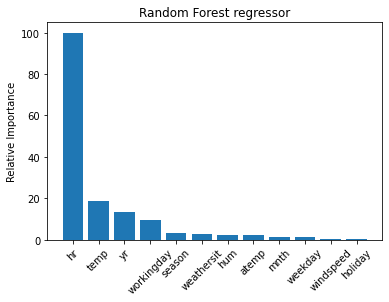

In [30]:
# extract and visualize the importance of features
RFFImp= rf_regressor.feature_importances_ 
RFFImp= 100.0 * (RFFImp / max(RFFImp))
index_sorted = np.flipud(np.argsort(RFFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

import matplotlib.pyplot as plt
plt.figure()
plt.bar(pos, RFFImp[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted], rotation=45)
plt.ylabel('Relative Importance')
plt.title("Random Forest regressor")
plt.show()

- This shows that the hour of the day is the most important feature, which makes sense intuitively if you think about it! 
- The next important feature is temperature, which is consistent with our earlier analysis. 